In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Research question: How is lockdown affect people's perceptions for remote work?
# Theoretical support: Lockdown create a big shock in people's life that motivate them to express their feeling, while enforced stay at home order restricted their real social interaction, people tend to express their feelings or experiences online using social media. Hence, their perceptions slowly converge and affect other social media users, forming a collective perceptions.
## First, let's take a look at people's perceptions towards remote work before and after lockdown.

In [222]:
# load data
df = pd.read_csv('remote_work_with_emotions.csv').drop(columns = ['Unnamed: 0'])
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,geo_id,retweets,...,geo_name,states_abbrev,clean_text,no_stopwords_text,no_remotework_text,lematize_text,emotion,scores,compound_score,sentiment
0,2729932651,TwelveRivers12,367,1862,We strive to raise the bar of what it means to...,"Austin, TX",#WFH but make it fashion (Twelve Rivers fashio...,2020-12-19 20:00:14+00:00,c3f37afa9efcf94b,1,...,"Austin, TX",TX,wfh but make it fashion twelve rivers fashion ...,wfh make fashion twelve rivers fashion office ...,make fashion twelve rivers fashion office big ...,make fashion twelve river fashion office big g...,neutral,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.8674,Positive
1,389908361,JuanC611,214,12248,"I'm a #BCB, craft beer drinkin #Kaskade listen...","Oxnard, CA","Step 2, in progress...\n#wfh #wfhlife @ Riverp...",2020-12-19 02:56:54+00:00,a3c0ae863771d69e,0,...,"Oxnard, CA",CA,step in progress wfh wfhlife riverpark,step progress wfh wfhlife riverpark,step progress wfhlife riverpark,step progress wfhlife riverpark,neutral,"{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'comp...",0.4215,Positive
2,737763400118198277,MissionTXperts,828,1618,Follow us on IG! @missiontxperts #FamousForExp...,"Mission, TX",Congratulations on your graduation!!! Welcome ...,2020-12-18 22:35:35+00:00,77633125ba089dcb,1,...,"Mission, TX",TX,congratulations on your graduation welcome to ...,congratulations graduation welcome missiontxpe...,congratulations graduation welcome missiontxpe...,congratulation graduation welcome missiontxper...,joy,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.7845,Positive
3,522212036,FitnessFoundry,2693,14002,Award Winning Personal Trainer| EMT-B 🚑 NSCA-R...,"Boston and Malden, MA",Part 2 #HomeWorkout \n\n#OldSchool Jumping Jac...,2020-12-18 19:07:33+00:00,75f5a403163f6f95,1,...,"Malden, MA",MA,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,part homeworkout oldschool jumping jack variat...,neutral,"{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou...",0.7003,Positive
4,1931184464,fixyourmattress,1236,17479,The only comfortable solution to SAGGING mattr...,USA,SAGGING bed❓ 🛏〰️🛏FIRM it up with MATTRESS HELP...,2020-12-18 18:46:21+00:00,7df9a00dcf914d5e,0,...,"Plantation, FL",FL,sagging bed firm it up with mattress helper un...,sagging bed firm mattress helper mattress supp...,sagging bed firm mattress helper mattress supp...,sagging bed firm mattress helper mattress supp...,neutral,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.8020,Positive


In [223]:
import datetime
df['created_at']= df['created_at'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S%z"))
df['date'] = df['created_at'].apply(lambda x: x.date())
df['year'] = df['created_at'].apply(lambda x: x.year)
df['month'] = df['created_at'].apply(lambda x: x.month)
df['tweet'] = 1

In [235]:
df['lockdown'] = df['created_at'].apply(lambda x: 'before' if x < Timestamp('2020-3-01 00:00:00+0000', tz='UTC') else 'during' if 
                                       ((x >= Timestamp('2020-3-01 00:00:00+0000', tz='UTC'))&(x <= Timestamp('2020-7-01 00:00:00+0000', tz='UTC')))
                                        else 'after')
df['lockdown'].value_counts()

during    14693
after     10606
before     2579
Name: lockdown, dtype: int64

In [327]:
df_agg_sen = df.groupby(['lockdown', 'sentiment']).sum().reset_index()
df_agg_sen = pd.concat([df_agg_sen.loc[3:], df_agg_sen.loc[:2]]).reset_index(drop = True)
df_agg_sen

,lockdown,sentiment,author_id,author_followers,author_tweets,retweets,replies,likes,quote_count,compound_score,year,month,tweet
0,before,Negative,3.769505e+19,1257112.0,5025147.0,57.0,71.0,415.0,7.0,-84.2040,498728.0,1607.0,247.0
1,before,Neutral,8.697684e+19,3433022.0,16200139.0,242.0,118.0,1122.0,22.0,0.0000,1197352.0,3741.0,593.0
2,before,Positive,2.759157e+20,9100106.0,47729277.0,711.0,345.0,3573.0,74.0,1030.6164,3511264.0,11402.0,1739.0
3,during,Negative,2.068842e+20,21434633.0,84407564.0,850.0,1151.0,8755.0,173.0,-762.0527,4237960.0,8004.0,2098.0
4,during,Neutral,5.063449e+20,53033140.0,217158097.0,2679.0,1769.0,20307.0,514.0,0.0000,9267760.0,17770.0,4588.0
5,during,Positive,1.076227e+21,65728691.0,254783893.0,4694.0,3703.0,39131.0,746.0,4427.7021,16174140.0,31066.0,8007.0
6,after,Negative,3.050080e+20,16982001.0,71593556.0,668.0,585.0,5889.0,81.0,-548.7395,2879550.0,10634.0,1425.0
7,after,Neutral,6.510789e+20,50729142.0,192736481.0,2091.0,1078.0,13242.0,324.0,0.0000,6153092.0,22588.0,3045.0
8,after,Positive,1.474055e+21,56700820.0,233804687.0,10092.0,2937.0,60528.0,2183.0,3495.4168,12399137.0,46103.0,6136.0


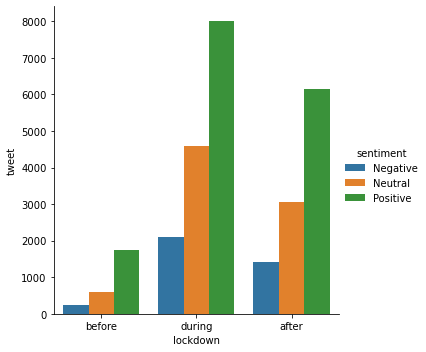

In [328]:
# plot number of remote work tweets
sns.catplot(data=df_agg_sen, x="lockdown", y='tweet', hue="sentiment", kind="bar")

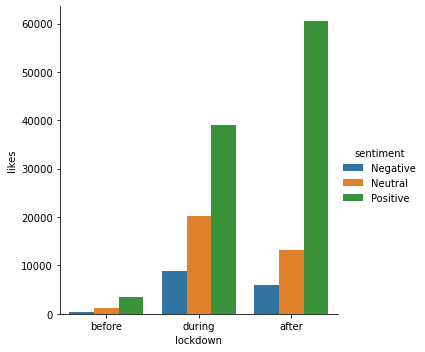

In [332]:
# plot aggregate number of retweets for different sentiment remote work tweet
sns.catplot(data=df_agg_sen, x="lockdown", y='likes', hue="sentiment", kind="bar")

In [255]:
# compare % of positive retweets in different lockdown time slot
345/(345+118+71), 4694/(4694+2679+850), 10092/(10092+2091+668)

(0.6460674157303371, 0.570837893712757, 0.785308536300677)

From the plot we can tell that all sentiment expression increased, but the number of positive tweets increased significantly during lockdown, the high volume of positive remote work tweets has a strong impact in forming a collective emotions and swing others perceptions towards remote work.
This can be demonstrated in number of retweets and number of likes, people clearly prefer positive remote work tweets and tend to spread them out after lockdown, which indicates the impact of collective emotions.

## Now let's dive in the emerging process of collective emotion, what changes their perception, how can they benefit from remote work

In [126]:
# aggregate date in month and explore ingranied emotion
per = df.date.dt.to_period('M')
df_agg_m = df.groupby(per).sum()
df_agg_m['date'] = df_agg_m.index
df_agg_m = df_agg_m.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
df2 = pd.melt(df_agg_m, id_vars = ['date'], value_vars = ['emotion_joy', 'emotion_sadness', 'emotion_anger', 'emotion_fear'])
df2

,date,variable,value
0,2019-03,emotion_joy,46.0
1,2019-04,emotion_joy,35.0
2,2019-05,emotion_joy,45.0
3,2019-06,emotion_joy,45.0
4,2019-07,emotion_joy,47.0
...,...,...,...
163,2022-06,emotion_fear,31.0
164,2022-07,emotion_fear,23.0
165,2022-08,emotion_fear,15.0
166,2022-09,emotion_fear,23.0


Text(0.5, 1.0, 'Monthly remote working emotion')

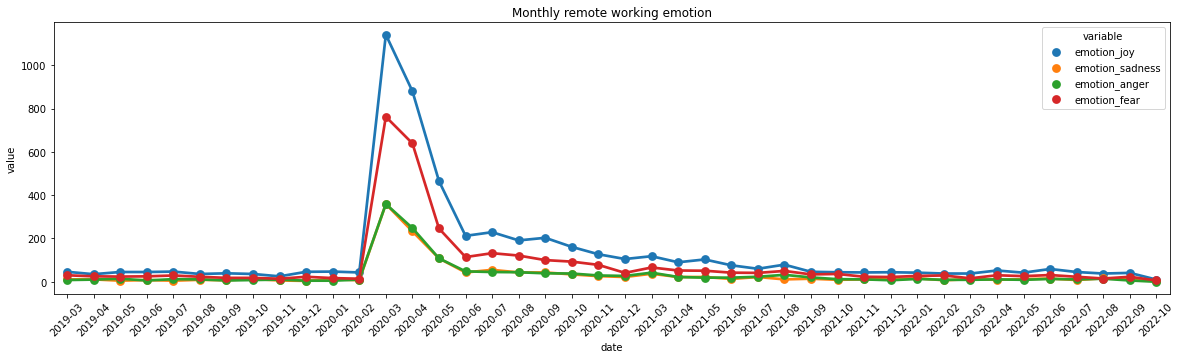

In [127]:
# plot monthly number of emotions
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='value',data=df2, hue='variable')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working emotion")

Interesting, looks like both joy and fear increased during lockdown, why people are enjoy and why people are fear

In [259]:
# explore remote work tweet in joy and fear during lockdown
data_lockdown = df[(df['created_at'] >= Timestamp('2020-3-01 00:00:00+0000', tz='UTC'))&(df['created_at'] <= Timestamp('2020-7-01 00:00:00+0000', tz='UTC'))].reset_index(drop = True)
data_joy = data_lockdown[data_lockdown['emotion']=='joy'].reset_index(drop = True)
data_fear = data_lockdown[data_lockdown['emotion']=='fear'].reset_index(drop = True)

In [260]:
#bi_gram
def get_gram(text):
    return [' '.join(x) for x in text]
from nltk.util import ngrams
data_joy['bi_gram'] = data_joy['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 2))))
data_joy['bi_gram'] = data_joy['bi_gram'].apply(lambda x: get_gram(x))
data_fear['bi_gram'] = data_fear['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 2))))
data_fear['bi_gram'] = data_fear['bi_gram'].apply(lambda x: get_gram(x))

In [264]:
#Tri_gram
data_joy['Tri_gram'] = data_joy['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 3))))
data_joy['Tri_gram'] = data_joy['Tri_gram'].apply(lambda x: get_gram(x))
data_fear['Tri_gram'] = data_fear['lematize_text'].apply(lambda x: (list(ngrams(x.split(), 3))))
data_fear['Tri_gram'] = data_fear['Tri_gram'].apply(lambda x: get_gram(x))

In [261]:
#top 20 bi_gram for joy
from collections import Counter
list_joy = []
for bi in data_joy['bi_gram']:
    list_joy.extend(bi) 
counts_joy = Counter(list_joy)
counts_joy.most_common()[:20]

[('working home', 110),
 ('work home', 83),
 ('good morning', 72),
 ('happy hour', 64),
 ('look like', 51),
 ('zoom meeting', 48),
 ('home office', 40),
 ('feel like', 40),
 ('new normal', 33),
 ('happy friday', 33),
 ('work remotely', 31),
 ('zoom u', 30),
 ('co worker', 28),
 ('womeninbusiness womenintech', 28),
 ('covid coronavirus', 26),
 ('ability work', 26),
 ('happy monday', 24),
 ('conference call', 24),
 ('team meeting', 22),
 ('good thing', 22)]

In [263]:
#top 20 Tri_gram for joy
list2 = []
for bi in data_joy['Tri_gram']:
    list2.extend(bi) 
counts1 = Counter(list2)
counts1.most_common()[:20]

[('ability work remotely', 25),
 ('womeninbusiness womenintech workingmom', 20),
 ('new webex work', 19),
 ('webex work bundle', 19),
 ('work bundle make', 19),
 ('bundle make much', 19),
 ('make much affordable', 19),
 ('much affordable everyone', 19),
 ('affordable everyone use', 19),
 ('everyone use webex', 19),
 ('use webex enterprise', 19),
 ('webex enterprise conferencing', 19),
 ('enterprise conferencing calling', 19),
 ('conferencing calling amp', 19),
 ('calling amp collaboration', 19),
 ('amp collaboration smb', 19),
 ('collaboration smb priceswebex', 19),
 ('smb priceswebex meeting', 19),
 ('priceswebex meeting webex', 19),
 ('meeting webex calling', 19)]

In [265]:
#top 20 bi_gram for fear
list_fear = []
for bi in data_fear['bi_gram']:
    list_fear.extend(bi) 
counts_fear = Counter(list_fear)
counts_fear.most_common()[:20]

[('working home', 65),
 ('work home', 49),
 ('home office', 42),
 ('zoom u', 42),
 ('conference call', 39),
 ('look like', 35),
 ('zoom call', 26),
 ('covid coronavirus', 23),
 ('thomas capone', 22),
 ('watch u', 20),
 ('year old', 20),
 ('collaboration remotelearning', 18),
 ('standing desk', 16),
 ('remotejobs remoteworklife', 16),
 ('w briancurtisnbc', 15),
 ('north carolina', 15),
 ('nbcdfw w', 14),
 ('remotelearning remotejobs', 14),
 ('coronavirus covid', 14),
 ('new york', 13)]

In [266]:
#top 20 Tri_gram for joy
list2 = []
for bi in data_fear['Tri_gram']:
    list2.extend(bi) 
counts1 = Counter(list2)
counts1.most_common()[:20]

[('remotelearning remotejobs remoteworklife', 14),
 ('collaboration remotelearning remotejobs', 13),
 ('thomas capone collaboration', 11),
 ('capone collaboration remotelearning', 11),
 ('remotejobs remoteworklife remoteemployees', 11),
 ('nbcdfw w briancurtisnbc', 9),
 ('lose weight make', 9),
 ('pm news nbcdfw', 7),
 ('selfie selfisolation wfhdailyheadgear', 7),
 ('selfisolation wfhdailyheadgear chapel', 7),
 ('wfhdailyheadgear chapel hill', 7),
 ('perry hall maryland', 7),
 ('zoom u call', 7),
 ('waltsable gmail com', 7),
 ('work home life', 7),
 ('news nbcdfw w', 6),
 ('chapel hill north', 6),
 ('hill north carolina', 6),
 ('coronavirus perry hall', 6),
 ('pm nbcdfw w', 5)]

In [267]:
# topic model
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim.corpora as corpora
def sent_to_words(sentences):
    '''
    tokenize words
    '''
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data_joy['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.289139 -0.028479       1        1  32.648958
3      0.081339  0.246015       2        1  27.553923
1     -0.194651 -0.127468       3        1  13.825398
2     -0.195344  0.121660       4        1  13.731005
0      0.019516 -0.211728       5        1  12.240717, topic_info=           Term        Freq       Total Category  logprob  loglift
31         home  412.000000  412.000000  Default  30.0000  30.0000
51        happy  352.000000  352.000000  Default  29.0000  29.0000
61        covid  281.000000  281.000000  Default  28.0000  28.0000
58         work  314.000000  314.000000  Default  27.0000  27.0000
296        like  270.000000  270.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
570        find   15.629808   16.317637   Topic5  -5.6940   2.0573
743  interested   15.293184   15.972419   Topic5  -5.7158   2.0569
954        read   14.979610   15.656744   Topic5  -5.7365   2.0562
264        wall   15.318640   16.012381   Topic5  -5.7141   2.0561
165       table   15.007220   15.701376   Topic5  -5.7346   2.0552

[197 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
738       5  0.994583     also
506       4  0.994891   always
21        4  0.988365  amazing
307       1  0.162696      amp
307       2  0.835464      amp
...     ...       ...      ...
353       5  0.980996    would
189       4  0.990169     year
1879      3  0.990797      yet
1121      3  0.976668     york
243       2  0.994582     zoom

[181 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [270]:
# topic model
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim.corpora as corpora
def sent_to_words(sentences):
    '''
    tokenize words
    '''
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data_fear['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.087509  0.188957       1        1  50.536266
1      0.095452 -0.153995       2        1  30.794798
2     -0.182961 -0.034962       3        1  18.668936, topic_info=        Term        Freq       Total Category  logprob  loglift
92      home  317.000000  317.000000  Default  30.0000  30.0000
73     covid  234.000000  234.000000  Default  29.0000  29.0000
4       call  109.000000  109.000000  Default  28.0000  28.0000
168      day  190.000000  190.000000  Default  27.0000  27.0000
43       dog  113.000000  113.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1086  normal   11.385336   12.540385   Topic3  -5.9389   1.5817
512     make   21.659819   91.050929   Topic3  -5.2957   0.2423
582   future   15.577729   37.770494   Topic3  -5.6253   0.7926
70      want   13.866734   25.638233   Topic3  -5.7417   1.0637
783     year   12.377762   59.671799   Topic3  -5.8553   0.1054

[151 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.961500  already
1         1  0.997731      amp
470       3  0.895725      ask
4459      3  0.959337      atl
3         1  0.985146     back
...     ...       ...      ...
297       1  0.030145    would
297       3  0.964630    would
783       1  0.787642     year
783       3  0.201100     year
102       2  0.992943     zoom

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [275]:
dog = data_fear[data_fear['lematize_text'].str.contains('call') == True].reset_index()
dog['lematize_text']

0      daughter interrupted conference call amp loudl...
1                         wanna call already living room
2      anyone used effinbirds image video call backgr...
3      called macys today disconnected message statin...
4      avtweeps avchallenges daychallenge fail far ho...
                             ...                        
159    working home year conference call video become...
160    moment kid running behind work video call beco...
161           every time jump call pet decide time fight
162    neighbor walking hall get exercise break desk ...
163    uforiascience mavie called oneyou u come dna d...
Name: lematize_text, Length: 164, dtype: object

First topic is about the concern about quartinelife and stay at home order, second topic is concern about interruption of conference call like your pet or family members, third topic is concern about financial situation for remote work (income, money)